In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('Social_Network_Ads.csv')

In [4]:
df=df.iloc[:,2:]

In [5]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


**Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=2)

**Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

scaler.fit(x_train)
# fit the scaler to train set , it will learn the parameter


# Transform train and test
x_train_scaled =scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [11]:
scaler.mean_

array([3.7787500e+01, 6.9359375e+04])

In [12]:
x_test_scaled =pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [13]:
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


In [14]:
np.round(x_train.describe())

,Age,EstimatedSalary
count,320.0,320.0
mean,38.0,69359.0
std,10.0,33970.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,69500.0
75%,46.0,87000.0
max,60.0,150000.0


**Effecct of scalig**

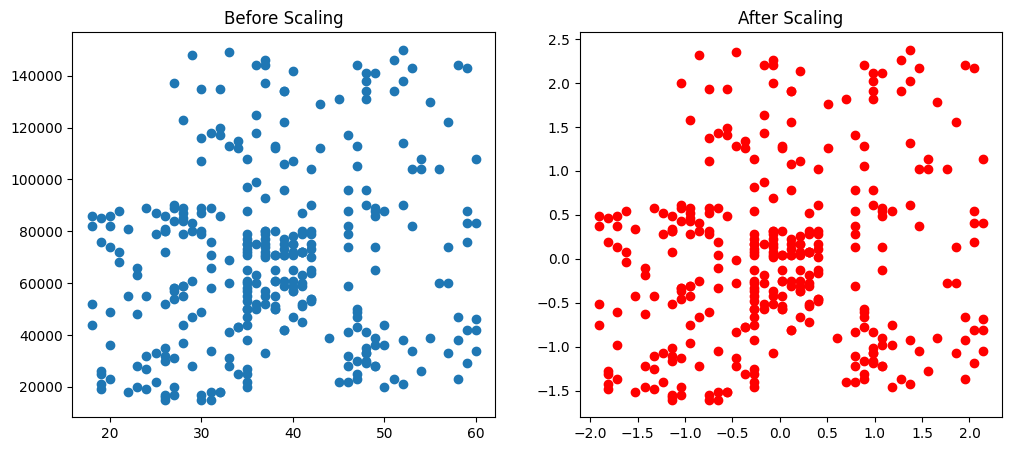

In [16]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

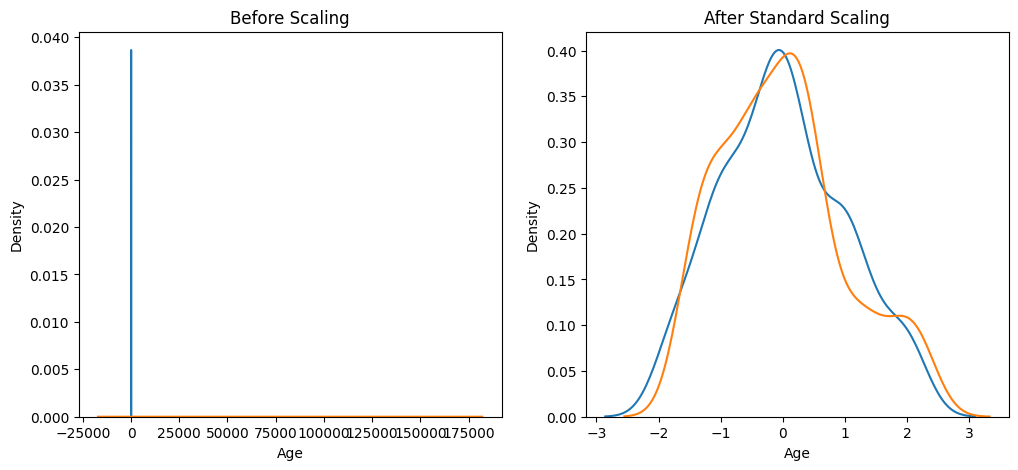

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

**Comparision after scaling**

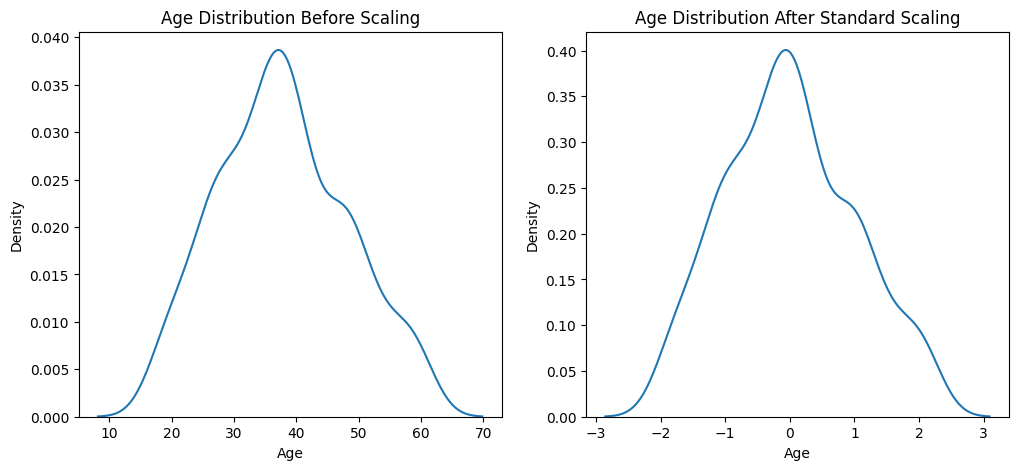

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

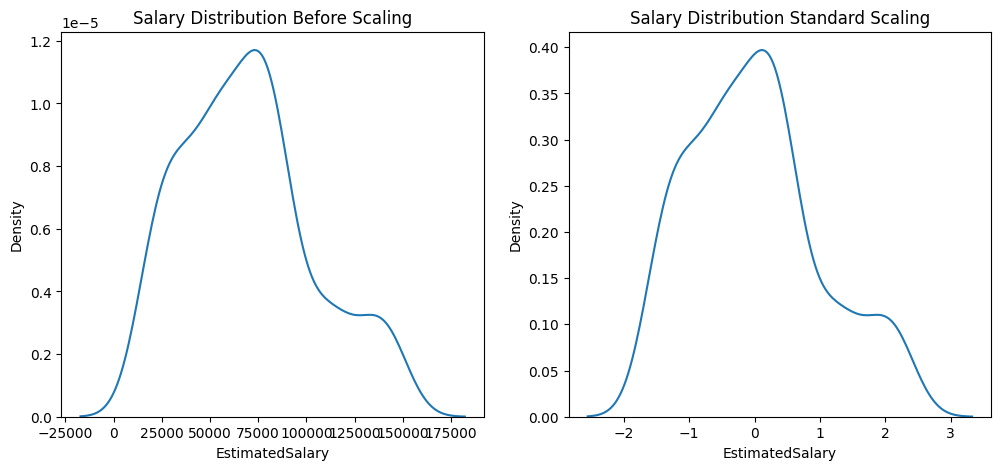

In [21]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

**Why Scaling Important**

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [26]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [28]:
y_pred =lr.predict(x_test)
y_scaled_pred =lr_scaled.predict(x_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_scaled_pred))

Actual 0.8125
Scaled 0.8125


**Effect of Outlier**

In [ ]:
df = df.concat(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

   Age  EstimatedSalary  Purchased
0   25            50000          0
1   30            80000          1
2    5             1000          0
3   90           250000          1
4   95           350000          1
